# Cleaning of TGS annovar output
1 SNP cleaning 2 Indel cleaning 3 Waterfall plot 4 VAF clone/subclone plot 5 CH mutation burden

In [1]:
intoMM<-read.table('IntOGen-DriverGenes_MM.tsv',header=T, sep="\t") #ok
NMCHIP<-read.csv('NMCHIP.csv',header=T)
MCHIP<-NMCHIP[which(NMCHIP$CH.category=='M-CHIP'),]
LCHIP<-NMCHIP[which(NMCHIP$CH.category=='L-CHIP'),]
allmut<-unique(c(intoMM$Symbol,NMCHIP$Gene))

In [2]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
list<-read.csv('PCDalllist-wxz0513.csv',header=T)
rownames(list)<-list$newID
metaMM<-list[which(list$diagnosis=='MM'),]
metaAL<-list[which(list$diagnosis=='AL'),]
metaPOEMS<-list[which(list$diagnosis=='POEMS'),]
metaMGUS<-list[which(list$diagnosis=='MGUS'),]

In [4]:
i=1
name<-paste('../final/result2/annovar/SNP/',list$newID[i],'.SNP.hg38_multianno.xls',sep='')
db1<-read.table(name,header=TRUE,sep='\t',fill = TRUE,quote='')
name2<-paste('../final/result2/vcf2/',list$newID[i],'.snp.raw.filter.final.vcf.input.hg38_multianno.csv',sep='')
db2<-read.csv(name2,header=TRUE)
db1$binder<-paste(db1$Chr,db1$Start,db1$End,sep="_")
db2$binder<-paste(db2$Chr,db2$Start,db2$End,sep="_")
dbsnp<-merge(db1,db2,by.x='binder',by.y='binder',all=T)
dbsnp$proper<-'SNP'
#
name<-paste('../final/result2/annovar/INDEL/',list$newID[i],'.INDEL.hg38_multianno.xls',sep='')
db1<-read.table(name,header=TRUE,sep='\t',fill = TRUE,quote='')
name2<-paste('../final/result2/vcf2/',list$newID[i],'.indel.raw.filter.final.vcf.input.hg38_multianno.csv',sep='')
db2<-read.csv(name2,header=TRUE)
db1$binder<-paste(db1$Chr,db1$Start,db1$End,sep="_")
db2$binder<-paste(db2$Chr,db2$Start,db2$End,sep="_")
dbindel<-merge(db1,db2,by.x='binder',by.y='binder',all=T)
dbindel$proper<-'INDEL'
db<-rbind(dbsnp,dbindel)
db<-db[,-15]
#
db$depth<-as.numeric(db$depth)
db<-db[which(db$depth>50),]
db$VAF<-as.numeric(db$VAF)
db<-db[which(db$VAF>0.02),]
db$ExAC_ALL<-as.numeric(db$ExAC_ALL)
dble1<-db[which(db$ExAC_ALL<0.01),]
dbna1<-db[which(is.na(db$ExAC_ALL)==TRUE),]
db<-rbind(dble1,dbna1)
db$'ALL.sites.2015_08'<-as.numeric(db$'ALL.sites.2015_08')
dble2<-db[which(db$'ALL.sites.2015_08'<0.01),]
dbna2<-db[which(is.na(db$'ALL.sites.2015_08')==TRUE),]
db<-rbind(dble2,dbna2)
db<-db[which(is.na(db$genomicSuperDups)==TRUE),]
db<-db[which(db$ExonicFunc.refGene!='synonymous SNV'),]
db$CADD_phred<-as.numeric(db$CADD_phred)
dble3<-db[which(db$CADD_phred>15),]
dbna3<-db[which(is.na(db$CADD_phred)==TRUE),]
db<-rbind(dble3,dbna3)
db$SIFT_score<-as.numeric(db$SIFT_score)
dble4<-db[which(db$SIFT_score<0.05),]
dbna4<-db[which(is.na(db$SIFT_score)==TRUE),]
db<-rbind(dble4,dbna4)
#
db$feature<-paste(db$Chr.x,db$Start.x,db$End.x,db$Ref.x,db$Alt.x,db$Gene.refGene,sep="_")
dbindel<-db[which(db$proper=='INDEL'),]
dbsnp<-db[which(db$proper=='SNP'),]
dballindel<-data.frame(c(dbindel$feature,'supp'),c(dbindel$VAF,1))
colnames(dballindel)<-c('feature',list$newID[i])
dfallindel<-dballindel
dballsnp<-data.frame(c(dbsnp$feature,'supp'),c(dbsnp$VAF,1))
colnames(dballsnp)<-c('feature',list$newID[i])
dfallsnp<-dballsnp
dflong<-db

In [5]:
for (i in 2:364){
name<-paste('../final/result2/annovar/SNP/',list$newID[i],'.SNP.hg38_multianno.xls',sep='')
db1<-read.table(name,header=TRUE,sep='\t',fill = TRUE,quote='')
name2<-paste('../final/result2/vcf2/',list$newID[i],'.snp.raw.filter.final.vcf.input.hg38_multianno.csv',sep='')
db2<-read.csv(name2,header=TRUE)
db1$binder<-paste(db1$Chr,db1$Start,db1$End,sep="_")
db2$binder<-paste(db2$Chr,db2$Start,db2$End,sep="_")
dbsnp<-merge(db1,db2,by.x='binder',by.y='binder',all=T)
dbsnp$proper<-'SNP'
#
name<-paste('../final/result2/annovar/INDEL/',list$newID[i],'.INDEL.hg38_multianno.xls',sep='')
db1<-read.table(name,header=TRUE,sep='\t',fill = TRUE,quote='')
name2<-paste('../final/result2/vcf2/',list$newID[i],'.indel.raw.filter.final.vcf.input.hg38_multianno.csv',sep='')
db2<-read.csv(name2,header=TRUE)
db1$binder<-paste(db1$Chr,db1$Start,db1$End,sep="_")
db2$binder<-paste(db2$Chr,db2$Start,db2$End,sep="_")
dbindel<-merge(db1,db2,by.x='binder',by.y='binder',all=T)
dbindel$proper<-'INDEL'
db<-rbind(dbsnp,dbindel)
db<-db[,-15]
#
db$depth<-as.numeric(db$depth)
db<-db[which(db$depth>50),]
db$VAF<-as.numeric(db$VAF)
db<-db[which(db$VAF>0.02),]
db$ExAC_ALL<-as.numeric(db$ExAC_ALL)
dble1<-db[which(db$ExAC_ALL<0.01),]
dbna1<-db[which(is.na(db$ExAC_ALL)==TRUE),]
db<-rbind(dble1,dbna1)
db$'ALL.sites.2015_08'<-as.numeric(db$'ALL.sites.2015_08')
dble2<-db[which(db$'ALL.sites.2015_08'<0.01),]
dbna2<-db[which(is.na(db$'ALL.sites.2015_08')==TRUE),]
db<-rbind(dble2,dbna2)
db<-db[which(is.na(db$genomicSuperDups)==TRUE),]
db<-db[which(db$ExonicFunc.refGene!='synonymous SNV'),]
db$CADD_phred<-as.numeric(db$CADD_phred)
dble3<-db[which(db$CADD_phred>15),]
dbna3<-db[which(is.na(db$CADD_phred)==TRUE),]
db<-rbind(dble3,dbna3)
db$SIFT_score<-as.numeric(db$SIFT_score)
dble4<-db[which(db$SIFT_score<0.05),]
dbna4<-db[which(is.na(db$SIFT_score)==TRUE),]
db<-rbind(dble4,dbna4)
#
db$feature<-paste(db$Chr.x,db$Start.x,db$End.x,db$Ref.x,db$Alt.x,db$Gene.refGene,sep="_")
dbindel<-db[which(db$proper=='INDEL'),]
dbsnp<-db[which(db$proper=='SNP'),]
dballindel<-data.frame(c(dbindel$feature,'supp'),c(dbindel$VAF,1))
colnames(dballindel)<-c('feature',list$newID[i])
dfallindel<-merge(dfallindel,dballindel,all=T)
dballsnp<-data.frame(c(dbsnp$feature,'supp'),c(dbsnp$VAF,1))
colnames(dballsnp)<-c('feature',list$newID[i])
dfallsnp<-merge(dfallsnp,dballsnp,all=T)
dflong<-rbind(dflong,db)
}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(e

In [6]:
dfallsnp<-dfallsnp[which(dfallsnp$feature!='supp'),]
for (i in 2:365){dfallsnp[,i]<-as.numeric(as.character(dfallsnp[,i]))}
dim(dfallsnp)
dfallindel<-dfallindel[which(dfallindel$feature!='supp'),]
for (i in 2:365){dfallindel[,i]<-as.numeric(as.character(dfallindel[,i]))}
dim(dfallindel)

[1] 2605  365

[1] 10107   365

Step 2 SNP converted to gene

In [7]:
df<-dfallsnp
df <- separate(df,feature, into= c('Chr','Start','End','Ref','Alt','Gene.refGene'),sep= "_")
df<-df[,6:370]
dfname<-df$Gene.refGene
df$Gene.refGene<-NULL
df[is.na(df)]<-0
df$Gene.refGene<-dfname
expr_df <-df %>% group_by(Gene.refGene) %>% summarise_each(funs(max(.,na.rm=TRUE)))
expr_df<-as.data.frame(expr_df)
rownames(expr_df)<-expr_df$Gene.refGene
expr_df$Gene.refGene<-NULL
expr_df2<-ifelse(expr_df > 0, 1, 0)
expr_df_snp<-expr_df
expr_df_snp2<-expr_df2
write.csv(expr_df_snp,'0429-snp-together.csv')
write.csv(expr_df_snp2,'0429-snp-together-bi.csv')

Warning message:
“`summarise_each_()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.
ℹ The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [8]:
df<-dfallindel
df <- separate(df,feature, into= c('Chr','Start','End','Ref','Alt','Gene.refGene'),sep= "_")
df<-df[,6:370]
dfname<-df$Gene.refGene
df$Gene.refGene<-NULL
df[is.na(df)]<-0
df$Gene.refGene<-dfname
expr_df <-df %>% group_by(Gene.refGene) %>% summarise_each(funs(max(.,na.rm=TRUE)))
expr_df<-as.data.frame(expr_df)
rownames(expr_df)<-expr_df$Gene.refGene
expr_df$Gene.refGene<-NULL
expr_df2<-ifelse(expr_df > 0, 1, 0)
expr_df_indel<-expr_df
expr_df_indel2<-expr_df2
write.csv(expr_df_indel,'0429-indel-together.csv')
write.csv(expr_df_indel,'0429-indel-together-bi.csv')

In [9]:
cleangenesnp<-expr_df_snp[intersect(allmut,rownames(expr_df_snp)),]
cleangenesnp2<-expr_df_snp2[intersect(allmut,rownames(expr_df_snp2)),]
write.csv(cleangenesnp,'0429-snp-allmut-together.csv')
write.csv(cleangenesnp2,'0429-snp-allmut-together-bi.csv')
cleangeneindel<-expr_df_indel[intersect(allmut,rownames(expr_df_indel)),]
cleangeneindel2<-expr_df_indel[intersect(allmut,rownames(expr_df_indel2)),]
write.csv(cleangeneindel,'0429-indel-allmut-together.csv')
write.csv(cleangeneindel2,'0429-indel-allmut-together-bi.csv')

In [10]:
Mchipgene<-expr_df_snp[intersect(MCHIP$Gene,rownames(expr_df_snp)),]
Mchipgene2<-expr_df_snp2[intersect(MCHIP$Gene,rownames(expr_df_snp2)),]
Lchipgene<-expr_df_snp[intersect(LCHIP$Gene,rownames(expr_df_snp)),]
Lchipgene2<-expr_df_snp2[intersect(LCHIP$Gene,rownames(expr_df_snp2)),]

In [11]:
library(ComplexHeatmap) 
library(circlize)
library(RColorBrewer)

Loading required package: grid

ComplexHeatmap version 2.4.3
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [12]:
allgene<-setdiff(rownames(cleangenesnp2),rownames(cleangeneindel2))
complement<-data.frame(matrix(ncol=364,nrow=length(allgene),0))
colnames(complement)<-colnames(cleangeneindel2)
rownames(complement)<-allgene
cleangeneindel3<-rbind(cleangeneindel2,complement)
cleangeneindel3<-cleangeneindel3[rownames(cleangenesnp2),colnames(cleangenesnp2)]

In [13]:
nmf<-read.delim( "./downsampling/H_bnmf_k6_4.tsv" )
rownames(nmf)<-nmf$X
nmf$'max_id'<-paste('c',nmf$'max_id',sep='')

In [14]:
col <- c( "SNP" = "steelblue","INDEL" = "black")
nmf2  <- HeatmapAnnotation(Diagnosis=nmf[metaMM$newID,]$'max_id',
                     show_annotation_name = TRUE,col = list(Diagnosis  = c("c0" = "#E41A1C","c1" = "#377EB8","c2" = "#4DAF4A","c3" = "#984EA3" )))
alter_fun <- list(
  background = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = "white", col = NA))
  },
  SNP = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = col["SNP"], col = NA))
  },
  INDEL = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h*0.33,  
              gp = gpar(fill = col["INDEL"], col = NA))
  }
)

All mutation types: SNP, INDEL



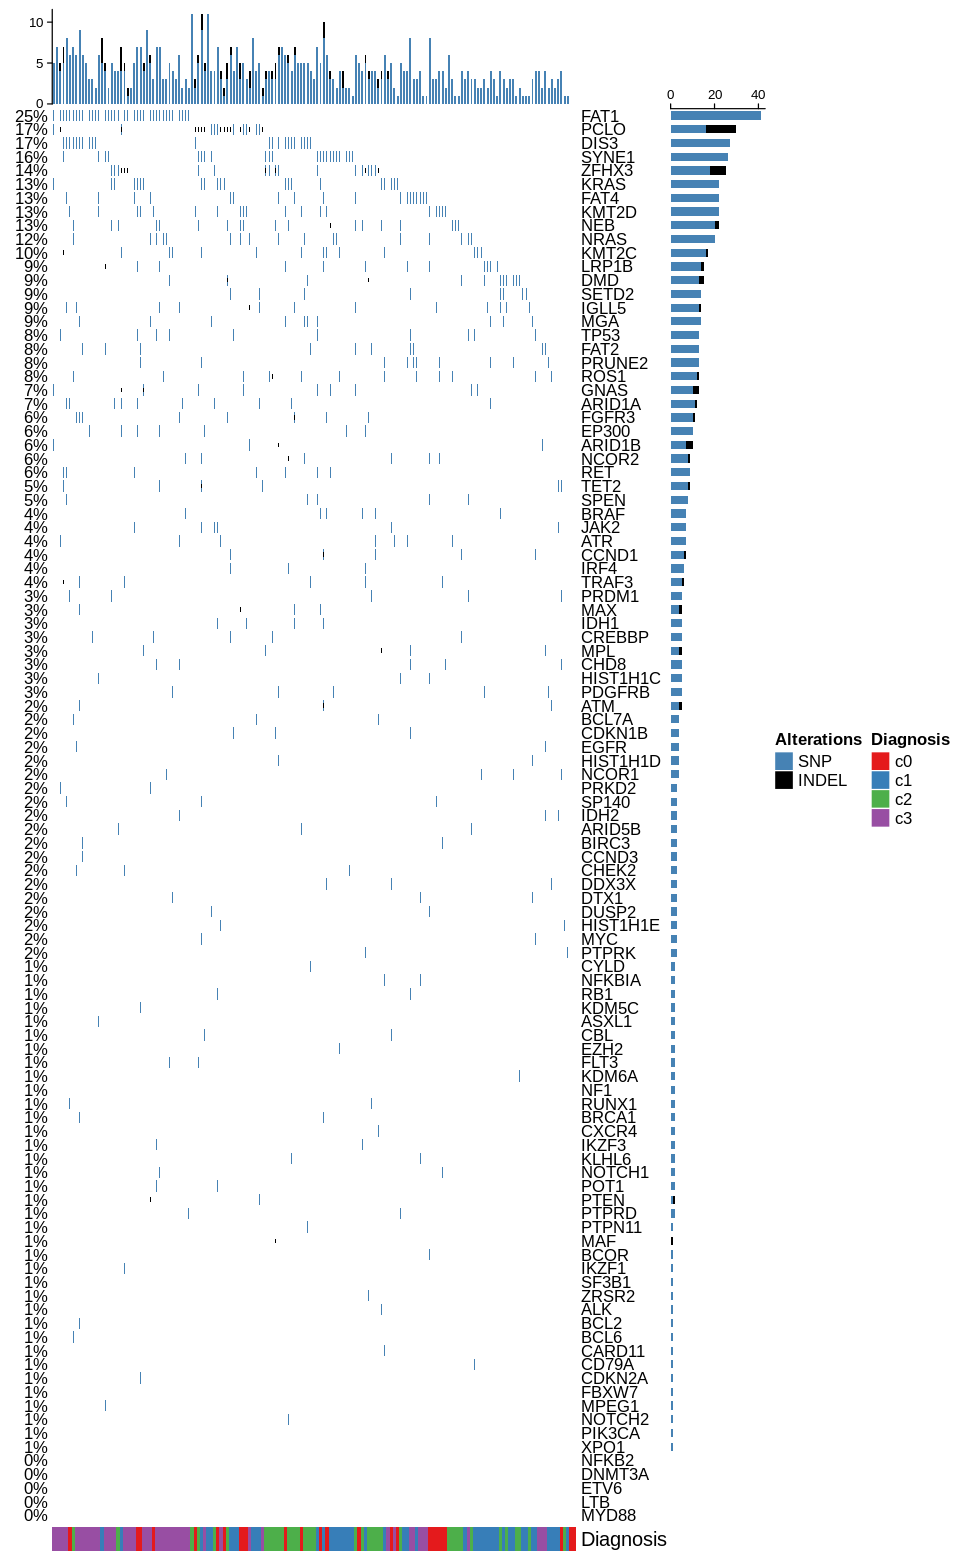

In [15]:
options(repr.plot.height=13,repr.plot.width=8)
mat_list_MM = list(SNP = as.matrix(cleangenesnp2[,metaMM$newID]),INDEL = as.matrix(cleangeneindel3[,metaMM$newID]))
oncoPrint(mat_list_MM, alter_fun = alter_fun, col = col, bottom_annotation = nmf2 )

In [16]:
pdf(file="test1.pdf",height=13,width=8)
oncoPrint(mat_list_MM, alter_fun = alter_fun, col = col, bottom_annotation = nmf2 )
dev.off()

All mutation types: SNP, INDEL



png 
  2

In [17]:
col <- c( "SNP" = "firebrick","INDEL" = "black")
nmf2  <- HeatmapAnnotation(Diagnosis=nmf[metaAL$newID,]$'max_id',
                     show_annotation_name = TRUE,col = list(Diagnosis  = c("c0" = "#E41A1C","c1" = "#377EB8","c2" = "#4DAF4A","c3" = "#984EA3" )))
alter_fun <- list(
  background = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = "white", col = NA))
  },
  SNP = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = col["SNP"], col = NA))
  },
  INDEL = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h*0.33,  
              gp = gpar(fill = col["INDEL"], col = NA))
  }
)

All mutation types: SNP, INDEL



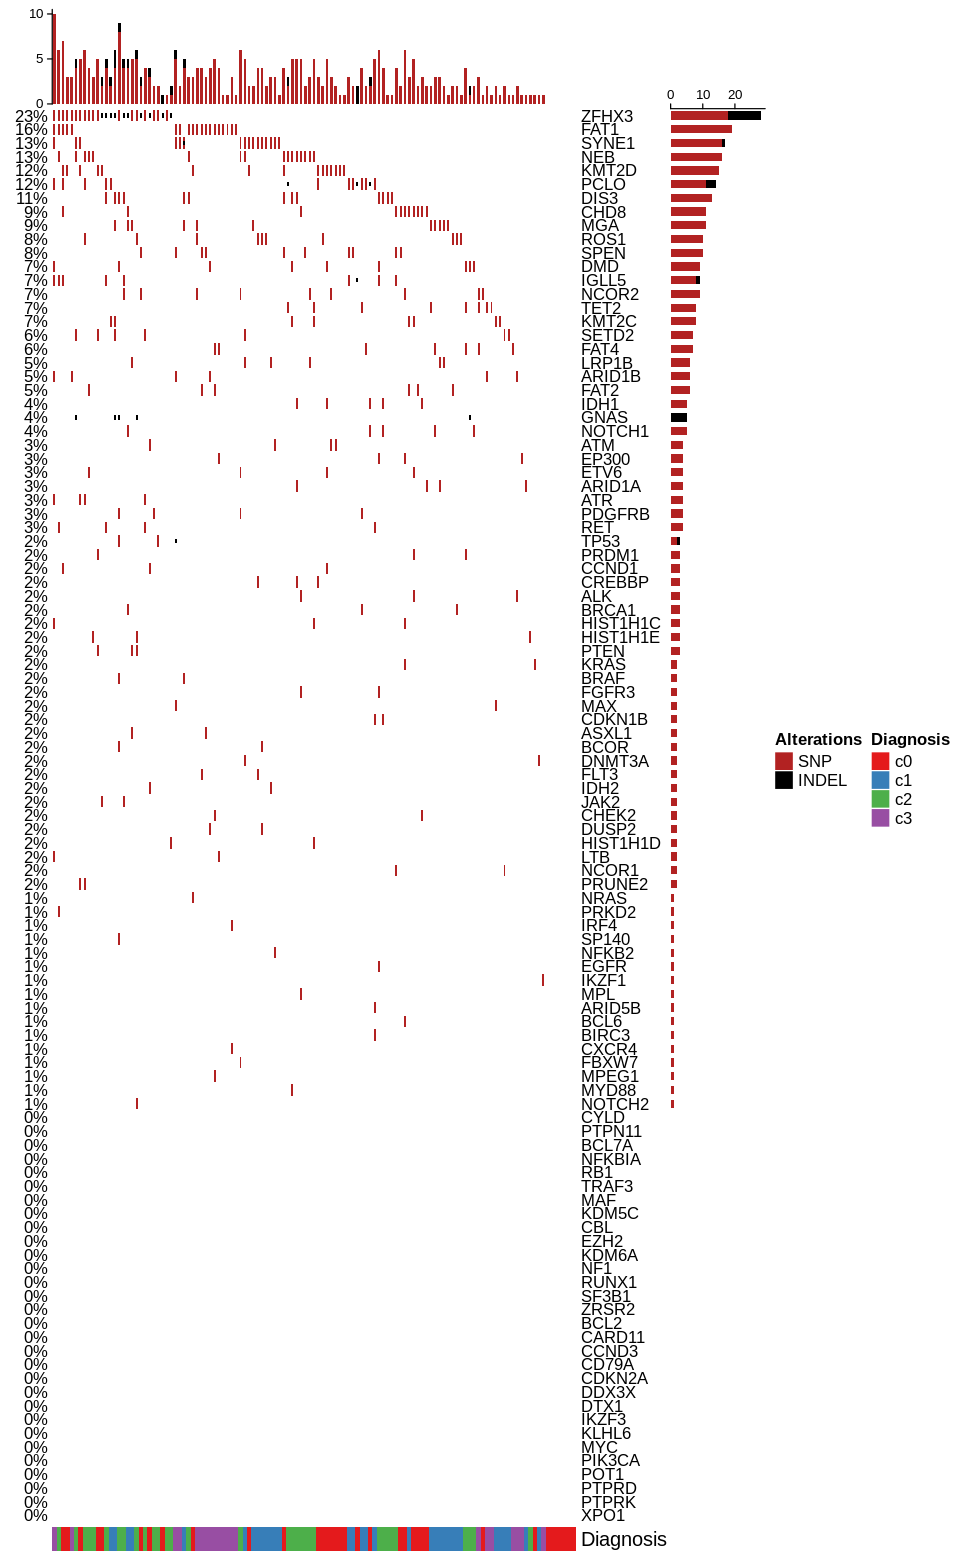

In [18]:
mat_list_AL = list(SNP = as.matrix(cleangenesnp2[,metaAL$newID]),INDEL = as.matrix(cleangeneindel3[,metaAL$newID]))
oncoPrint(mat_list_AL, alter_fun = alter_fun, col = col,bottom_annotation = nmf2 )

In [19]:
pdf(file="test2.pdf",height=13,width=8)
oncoPrint(mat_list_AL, alter_fun = alter_fun, col = col,bottom_annotation = nmf2 )
dev.off()

All mutation types: SNP, INDEL



png 
  2

In [20]:
col <- c( "SNP" = "darkgreen","INDEL" = "black")
nmf2  <- HeatmapAnnotation(Diagnosis=nmf[metaPOEMS$newID,]$'max_id',
                     show_annotation_name = TRUE,col = list(Diagnosis  = c("c0" = "#E41A1C","c1" = "#377EB8","c2" = "#4DAF4A","c3" = "#984EA3" )))
alter_fun <- list(
  background = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = "white", col = NA))
  },
  SNP = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = col["SNP"], col = NA))
  },
  INDEL = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h*0.33,  
              gp = gpar(fill = col["INDEL"], col = NA))
  }
)

All mutation types: SNP, INDEL



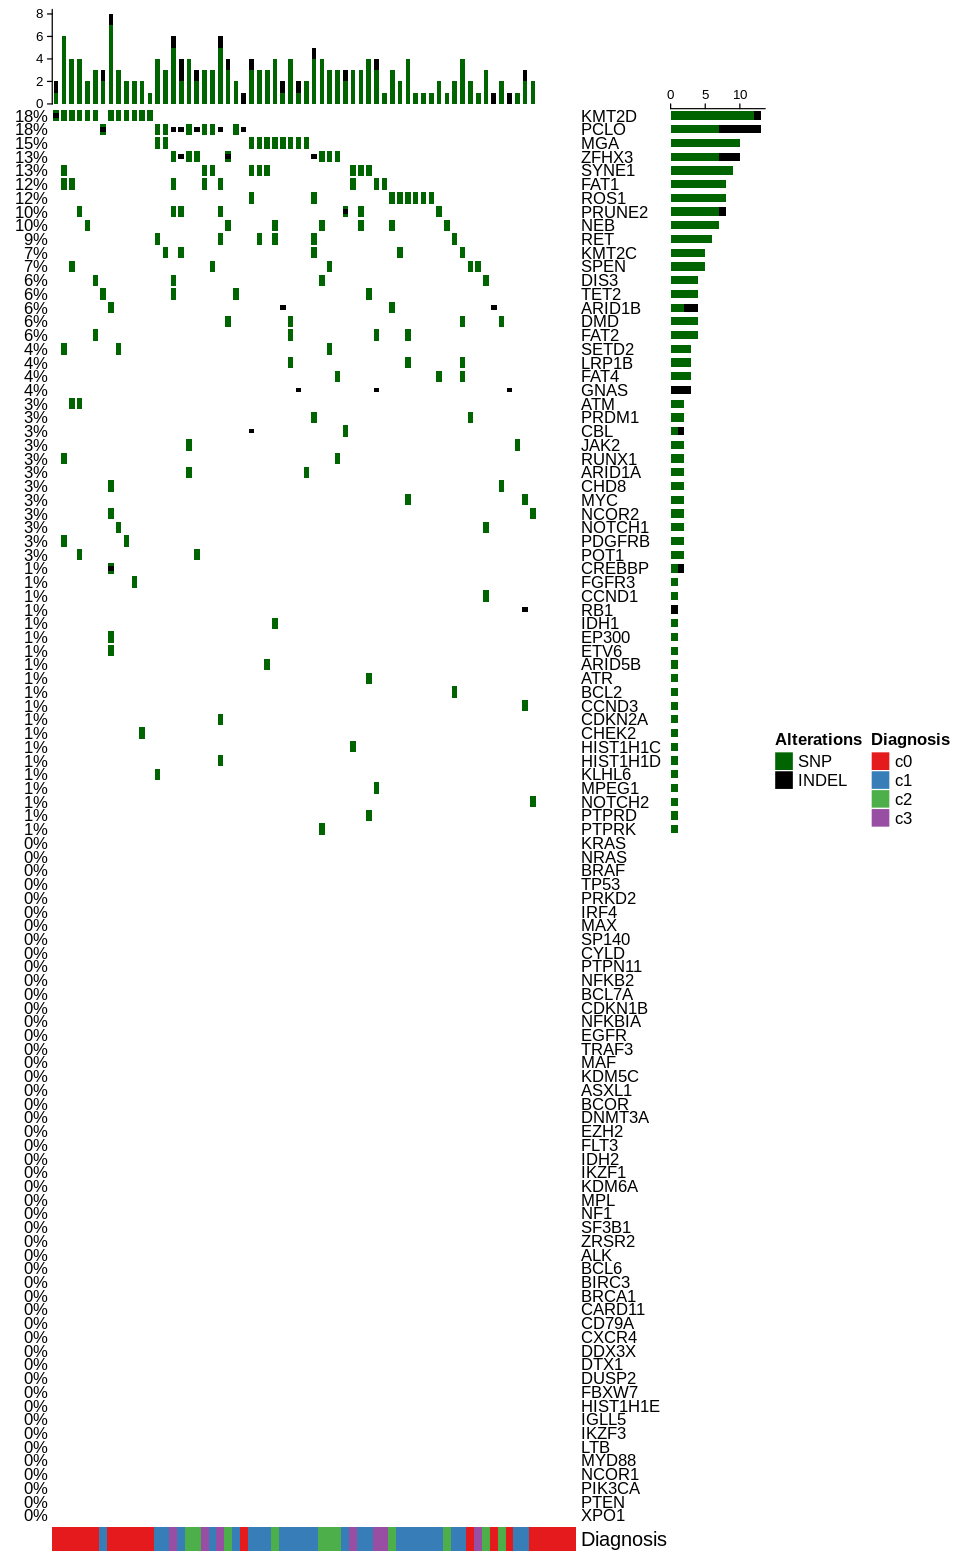

In [21]:
mat_list_POEMS = list(SNP = as.matrix(cleangenesnp2[,metaPOEMS$newID]),INDEL = as.matrix(cleangeneindel3[,metaPOEMS$newID]))
oncoPrint(mat_list_POEMS, alter_fun = alter_fun, col = col,bottom_annotation = nmf2 )

In [22]:
pdf(file="test3.pdf",height=13,width=8)
oncoPrint(mat_list_POEMS, alter_fun = alter_fun, col = col,bottom_annotation = nmf2 )
dev.off()

All mutation types: SNP, INDEL



png 
  2

In [23]:
col <- c( "SNP" = "orange","INDEL" = "black")
nmf2  <- HeatmapAnnotation(Diagnosis=nmf[metaMGUS$newID,]$'max_id',
                     show_annotation_name = TRUE,col = list(Diagnosis  = c("c0" = "#E41A1C","c1" = "#377EB8","c2" = "#4DAF4A","c3" = "#984EA3" )))
alter_fun <- list(
  background = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = "white", col = NA))
  },
  SNP = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h-unit(0.5, "mm"), 
              gp = gpar(fill = col["SNP"], col = NA))
  },
  INDEL = function(x, y, w, h) {
    grid.rect(x, y, w-unit(0.5, "mm"), h*0.33,  
              gp = gpar(fill = col["INDEL"], col = NA))
  }
)

All mutation types: SNP, INDEL



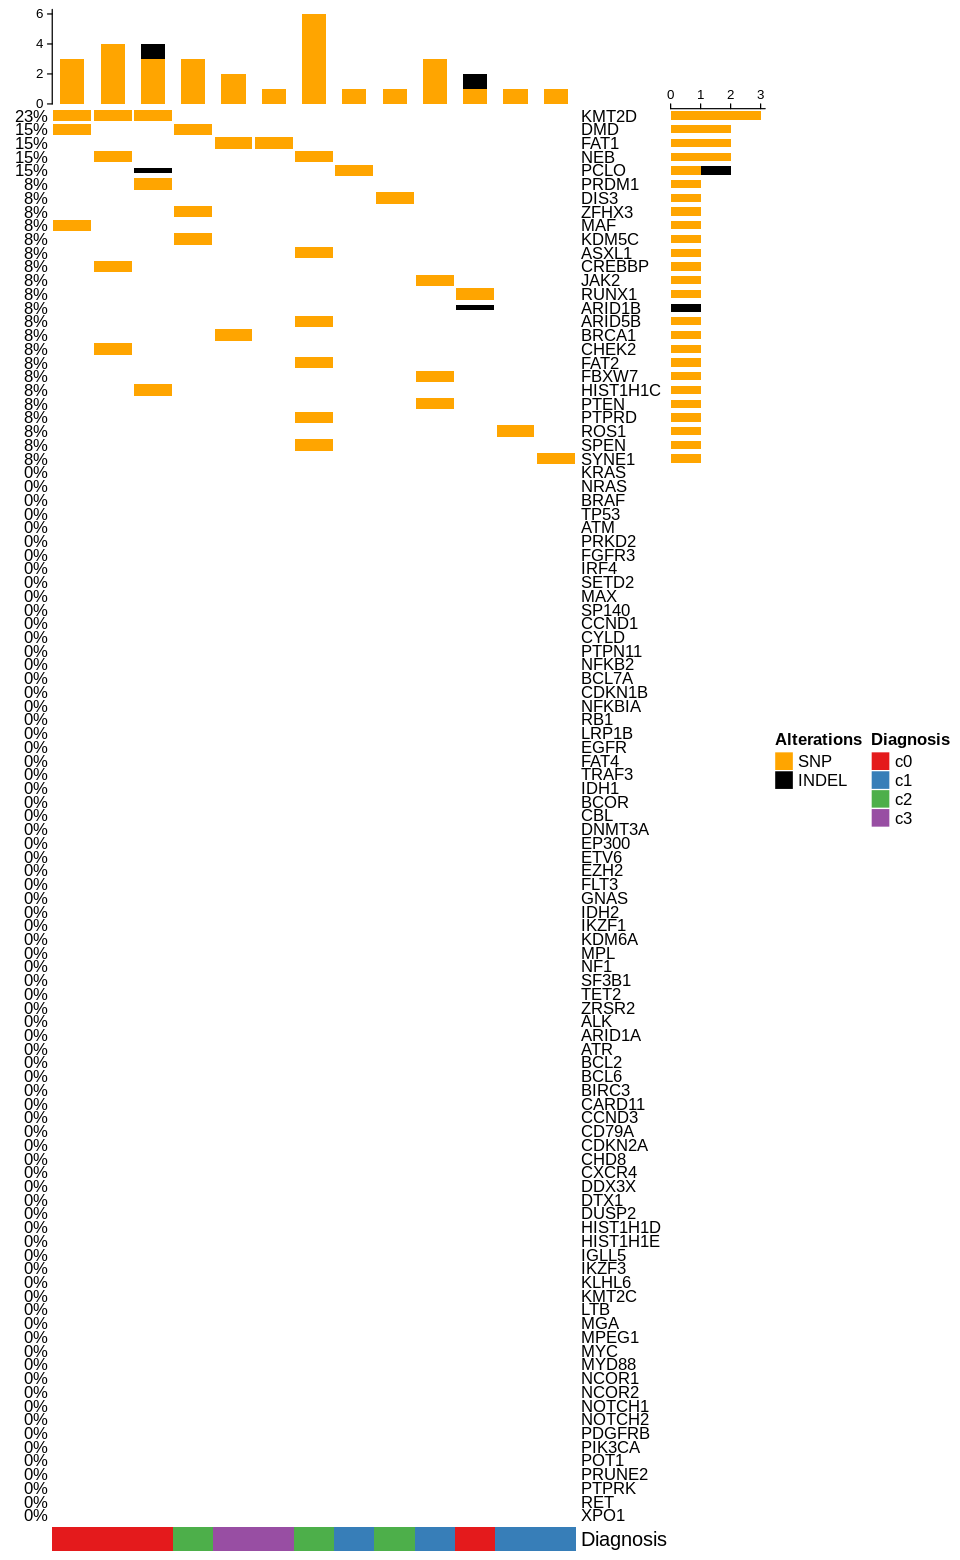

In [24]:
mat_list_MGUS = list(SNP = as.matrix(cleangenesnp2[,metaMGUS$newID]),INDEL = as.matrix(cleangeneindel3[,metaMGUS$newID]))
oncoPrint(mat_list_MGUS,  alter_fun = alter_fun, col = col,bottom_annotation = nmf2 )

In [25]:
pdf(file="test4.pdf",height=13,width=7)
oncoPrint(mat_list_MGUS,  alter_fun = alter_fun, col = col,bottom_annotation = nmf2 )
dev.off()

All mutation types: SNP, INDEL



png 
  2

In [26]:
library(ggplot2)
library(forcats)
library(viridis)
library(ggbeeswarm)

Loading required package: viridisLite



In [27]:
MM<-list[which(list$diagnosis=='MM'),]
AL<-list[which(list$diagnosis=='AL'),]
POEMS<-list[which(list$diagnosis=='POEMS'),]
MGUS<-list[which(list$diagnosis=='MGUS'),]

Warning message:
“Removed 64 rows containing non-finite values (stat_ydensity).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropp

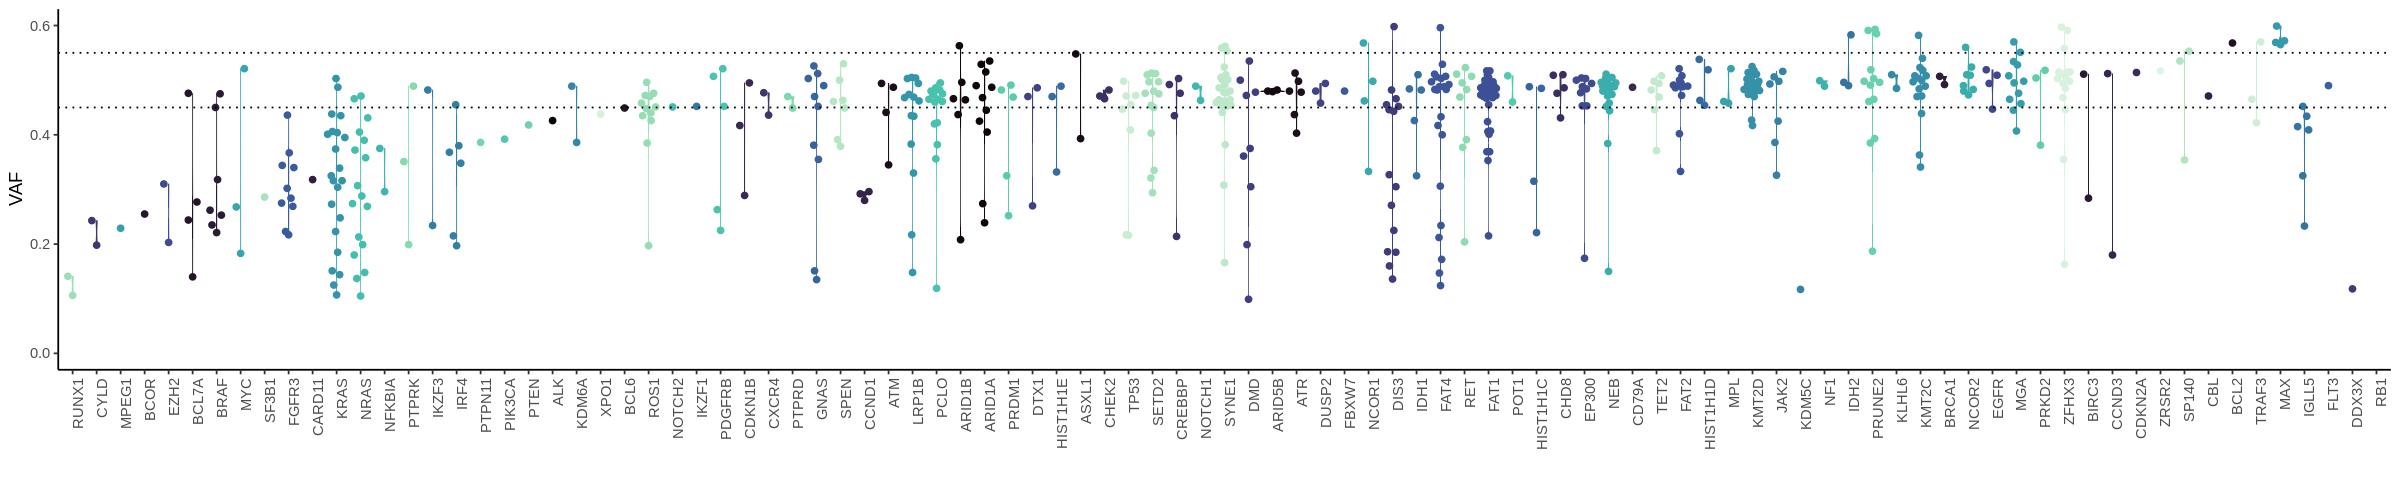

In [28]:
options(repr.plot.height=4,repr.plot.width=20)
data <- as.data.frame(t(cleangenesnp[,MM$newID]))
# Data is at wide format, we need to make it 'tidy' or 'long'
data <- data %>% gather(key="text", value="value")
data<-data[which(data$value!=0),]
# Plot
p <- data %>%
  mutate(text = fct_reorder(text, value)) %>% # Reorder data
  ggplot( aes(x=text, y=value, fill=text, color=text)) +
   geom_violin(width=1, size=0.2) +
   scale_fill_viridis(discrete=TRUE,option='mako') +
   scale_color_viridis(discrete=TRUE,option='mako') +
   geom_quasirandom(aes(color = text))+
    theme_classic()+
   theme(legend.position = "none", axis.text.x = element_text(angle=90, hjust=1)) +
   # coord_flip() + # This switch X and Y axis and allows to get the horizontal version
    xlab("") +
    ylab("VAF") +
    geom_hline(yintercept=c(0.45,0.55), linetype="dotted")+
    ylim(0,0.6)
p

In [29]:
pdf(file="honey1.pdf",height=4,width=20)
p
dev.off()

Warning message:
“Removed 64 rows containing non-finite values (stat_ydensity).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropp

png 
  2

Warning message:
“Removed 17 rows containing non-finite values (stat_ydensity).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropp

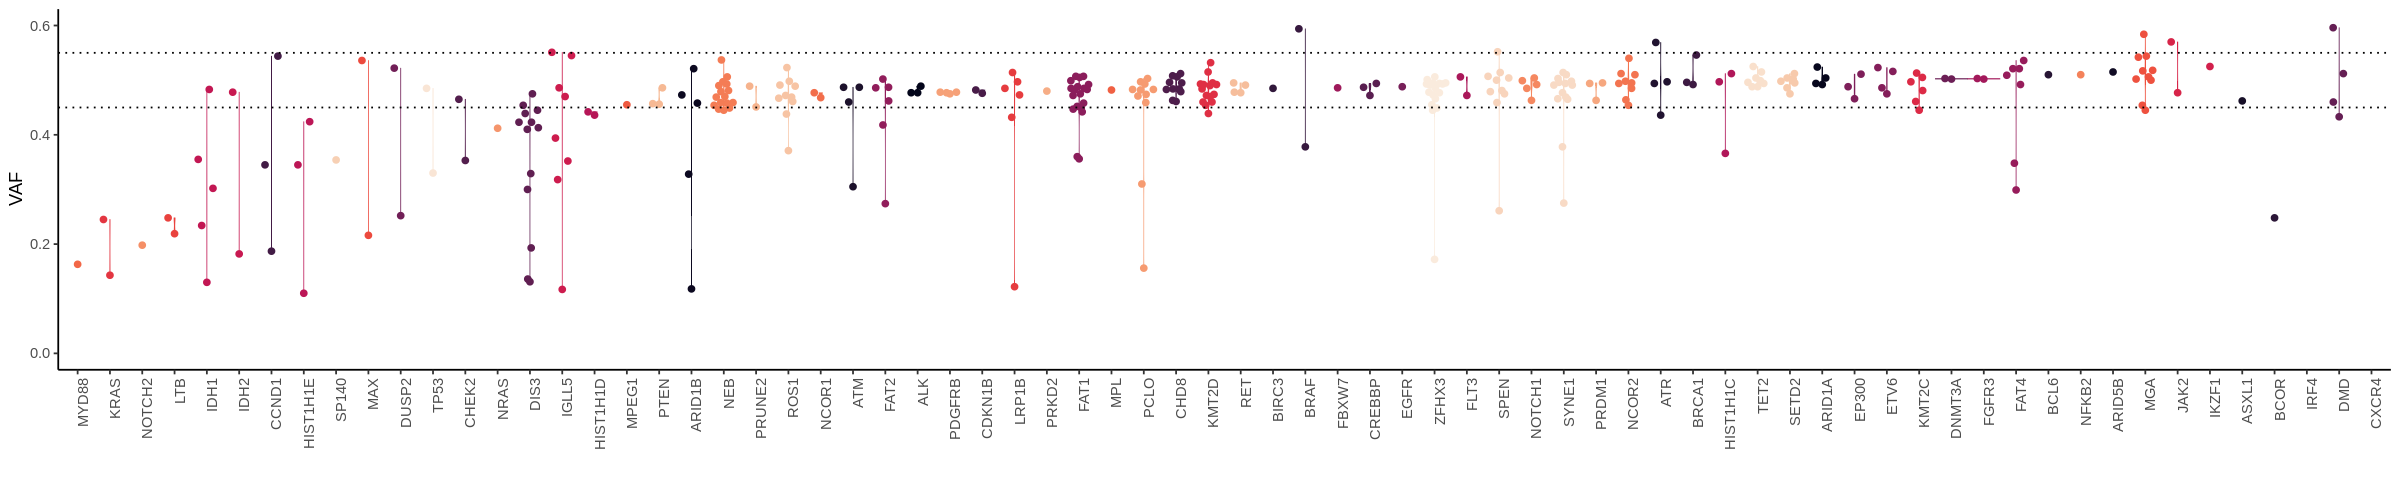

In [30]:
data <- as.data.frame(t(cleangenesnp[,AL$newID]))
# Data is at wide format, we need to make it 'tidy' or 'long'
data <- data %>% gather(key="text", value="value")
data<-data[which(data$value!=0),]
# Plot
p <- data %>%
   mutate(text = fct_reorder(text, value)) %>% # Reorder data
  ggplot( aes(x=text, y=value, fill=text, color=text)) +
   geom_violin(width=1, size=0.2) +
   scale_fill_viridis(discrete=TRUE,option='rocket') +
   scale_color_viridis(discrete=TRUE,option='rocket') +
   geom_quasirandom(aes(color = text))+
    theme_classic()+
   theme(legend.position = "none", axis.text.x = element_text(angle=90, hjust=1)) +
  #  coord_flip() + # This switch X and Y axis and allows to get the horizontal version
    xlab("") +
    ylab("VAF")+
    geom_hline(yintercept=c(0.45,0.55), linetype="dotted")+
    ylim(0,0.6)

p

In [31]:
pdf(file="honey2.pdf",height=4,width=20)
p
dev.off()

Warning message:
“Removed 17 rows containing non-finite values (stat_ydensity).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropp

png 
  2

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been droppe

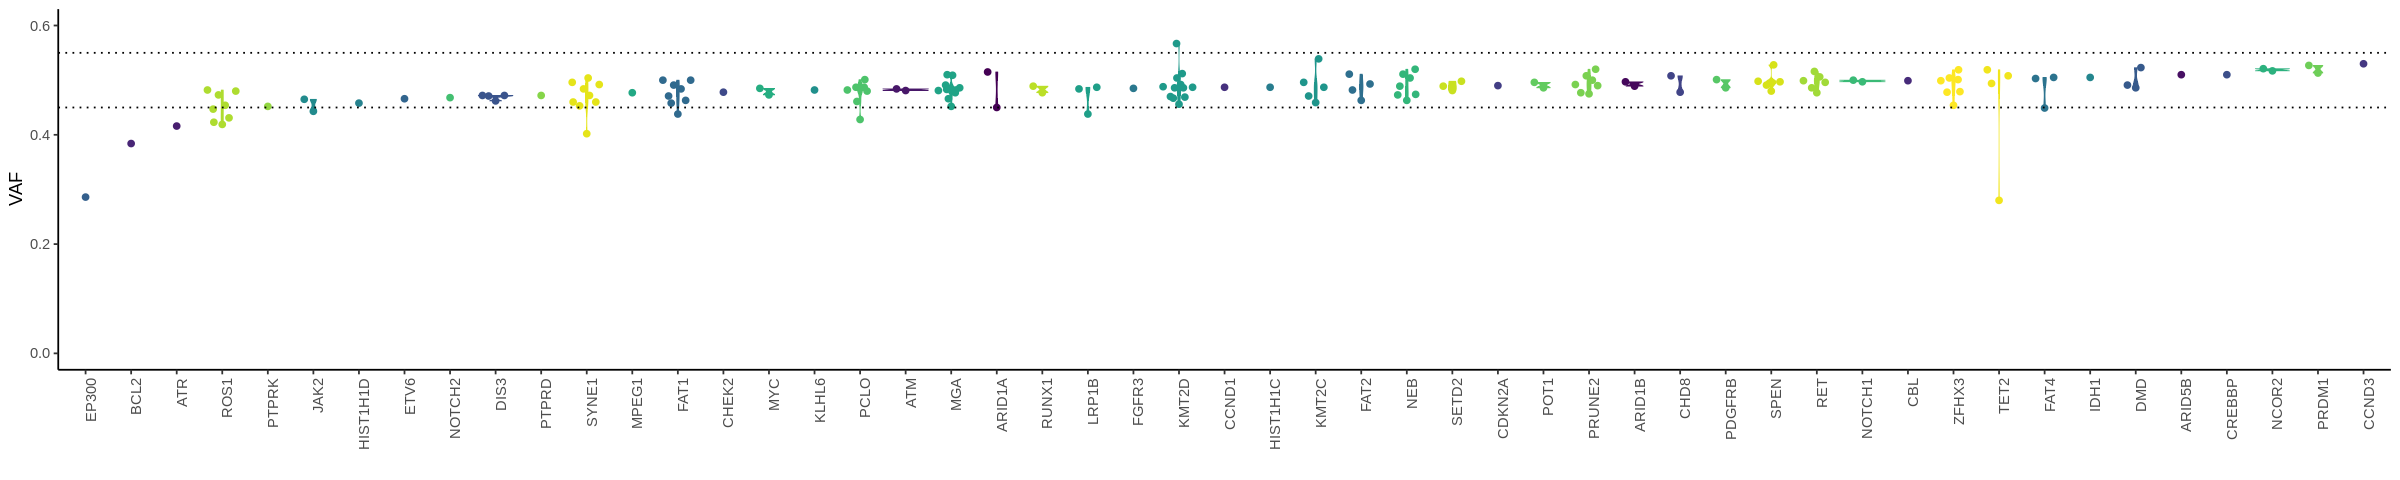

In [32]:
data <- as.data.frame(t(cleangenesnp[,POEMS$newID]))
# Data is at wide format, we need to make it 'tidy' or 'long'
data <- data %>% gather(key="text", value="value")
data<-data[which(data$value!=0),]
# Plot
p <- data %>%
  mutate(text = fct_reorder(text, value)) %>% # Reorder data
  ggplot( aes(x=text, y=value, fill=text, color=text)) +
   geom_violin(width=1, size=0.2) +
   scale_fill_viridis(discrete=TRUE,option='viridis') +
   scale_color_viridis(discrete=TRUE,option='viridis') +
   geom_quasirandom(aes(color = text))+
    theme_classic()+
   theme(legend.position = "none", axis.text.x = element_text(angle=90, hjust=1)) +
 #   coord_flip() + # This switch X and Y axis and allows to get the horizontal version
    xlab("") +
    ylab("VAF")+
    geom_hline(yintercept=c(0.45,0.55), linetype="dotted")+
    ylim(0,0.6)
p

In [33]:
pdf(file="honey3.pdf",height=4,width=20)
p
dev.off()

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been droppe

png 
  2

In [34]:
library(ggpubr)
library(RColorBrewer)

In [35]:
MMburden<-cbind(as.data.frame(colSums(Mchipgene2[,MM$newID])),as.data.frame(colSums(Lchipgene2[,MM$newID])))
ALburden<-cbind(as.data.frame(colSums(Mchipgene2[,AL$newID])),as.data.frame(colSums(Lchipgene2[,AL$newID])))
POEMSburden<-cbind(as.data.frame(colSums(Mchipgene2[,POEMS$newID])),as.data.frame(colSums(Lchipgene2[,POEMS$newID])))
MGUSburden<-cbind(as.data.frame(colSums(Mchipgene2[,MGUS$newID])),as.data.frame(colSums(Lchipgene2[,MGUS$newID])))

In [36]:
colnames(MMburden)<-c('MCHIP','LCHIP')
colnames(ALburden)<-c('MCHIP','LCHIP')
colnames(POEMSburden)<-c('MCHIP','LCHIP')
colnames(MGUSburden)<-c('MCHIP','LCHIP')
allburden<-rbind(MMburden,ALburden,POEMSburden,MGUSburden)
allburden<-cbind(allburden,list[rownames(allburden),])

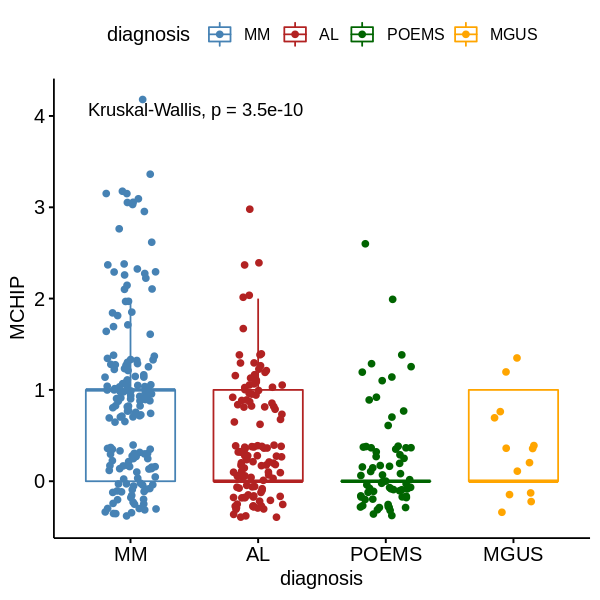

In [37]:
options(repr.plot.height=5,repr.plot.width=5)
ggboxplot(allburden, x="diagnosis", y="MCHIP", color = "diagnosis",palette =c('steelblue','firebrick','darkgreen','orange'),  add = "jitter")+
  stat_compare_means()
ggsave(filename="MCHIP.pdf",height=5,width=5)

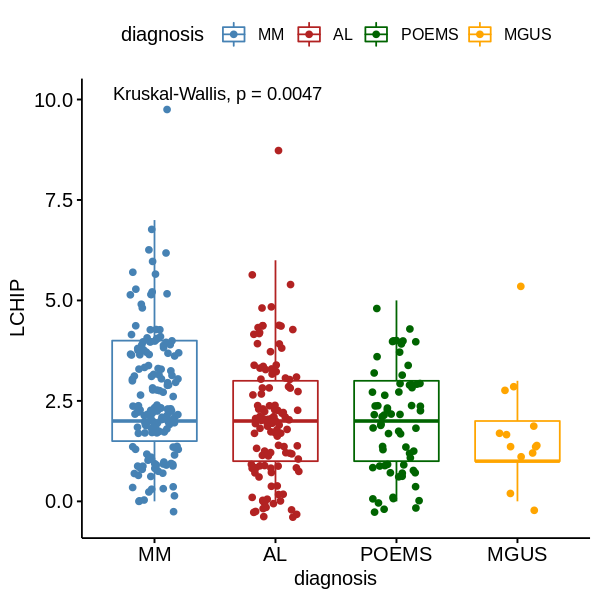

In [38]:
ggboxplot(allburden, x="diagnosis", y="LCHIP", color = "diagnosis",palette =c('steelblue','firebrick','darkgreen','orange'),  add = "jitter")+
  stat_compare_means()
ggsave(filename="LCHIP.pdf",height=5,width=5)

In [39]:
library(openxlsx)
MMgroups<-read.xlsx('Table S3-re.xlsx', sheet = 1, startRow = 1, colNames = TRUE, rowNames = FALSE)
ALgroups<-read.xlsx('Table S4-re.xlsx', sheet = 1, startRow = 1, colNames = TRUE, rowNames = FALSE)
POEMSgroups<-read.xlsx('Table S5-re.xlsx', sheet = 1, startRow = 1, colNames = TRUE, rowNames = FALSE)
MGUSgroups<-read.csv('0108-MGUSgroups.csv')

In [40]:
MGUSnames<-list[which(list$diagnosis=='MGUS'),]
rownames(MGUSnames)<-MGUSnames$name
MGUSgroups<-cbind(MGUSgroups,MGUSnames[MGUSgroups$name,])
age<-rbind(MMgroups[,c('newID','Age')],ALgroups[,c('newID','Age')],POEMSgroups[,c('newID','Age')])
MGUSage<-MGUSgroups[,c('newID','age')]
colnames(MGUSage)<-c('newID','Age')
age<-rbind(age,MGUSage)
rownames(age)<-age$newID
allburden<-cbind(allburden,age[allburden$newID,])
write.csv(allburden,file='0429-allburden.csv')

In [41]:
allburden$newID<-NULL
allburdenMM<-allburden[which(allburden$diagnosis=='MM'),]
allburdenAL<-allburden[which(allburden$diagnosis=='AL'),]
allburdenPOEMS<-allburden[which(allburden$diagnosis=='POEMS'),]
allburdenMGUS<-allburden[which(allburden$diagnosis=='MGUS'),]

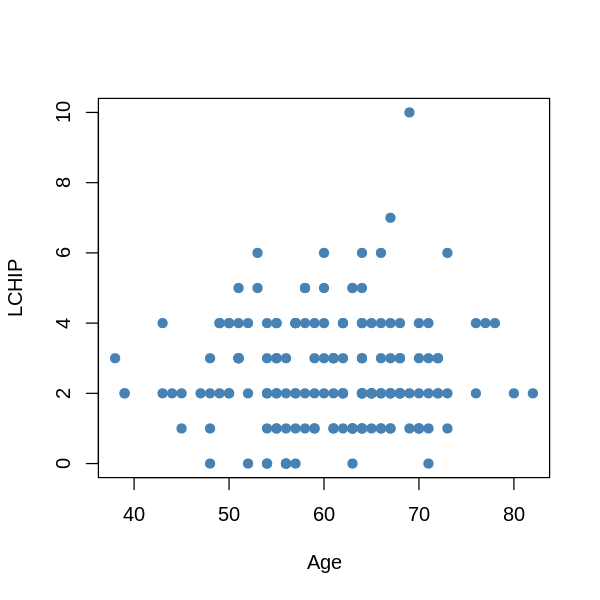

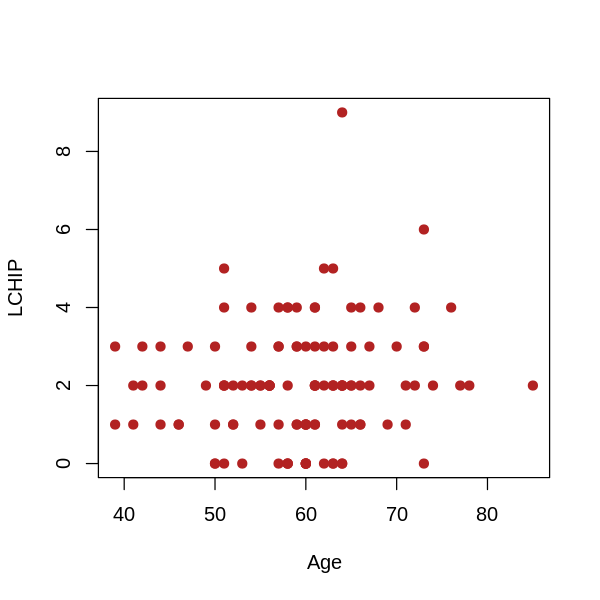

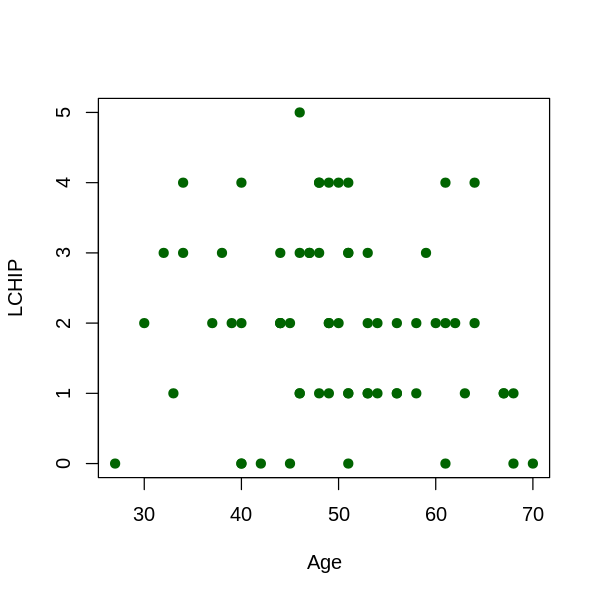

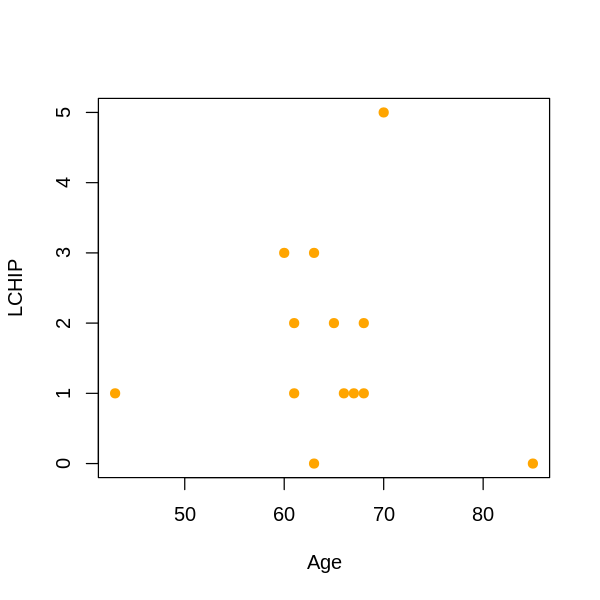

In [42]:
plot(allburdenMM[,c('Age','LCHIP')],col='steelblue',pch=19)
plot(allburdenAL[,c('Age','LCHIP')],col='firebrick',pch=19)
plot(allburdenPOEMS[,c('Age','LCHIP')],col='darkgreen',pch=19)
plot(allburdenMGUS[,c('Age','LCHIP')],col='orange',pch=19)

In [43]:
pdf(file="LCHIP1.pdf",height=5,width=5)
plot(allburdenMM[,c('Age','LCHIP')],col='steelblue',pch=19)
dev.off()
pdf(file="LCHIP2.pdf",height=5,width=5)
plot(allburdenAL[,c('Age','LCHIP')],col='firebrick',pch=19)
dev.off()
pdf(file="LCHIP3.pdf",height=5,width=5)
plot(allburdenPOEMS[,c('Age','LCHIP')],col='darkgreen',pch=19)
dev.off()
pdf(file="LCHIP4.pdf",height=5,width=5)
plot(allburdenMGUS[,c('Age','LCHIP')],col='orange',pch=19)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

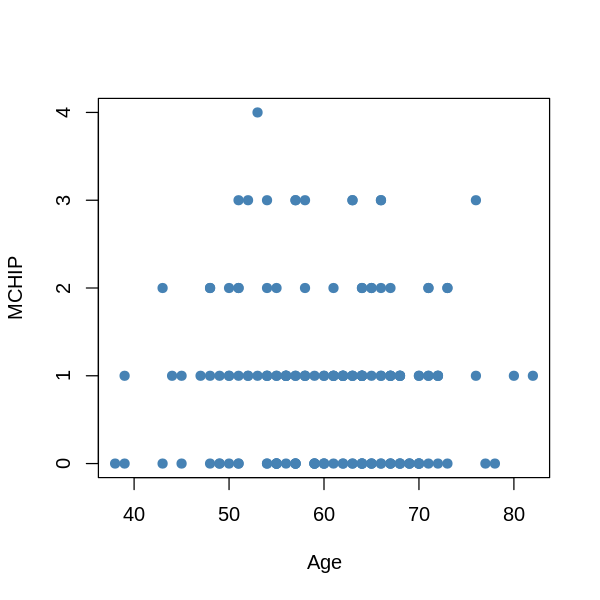

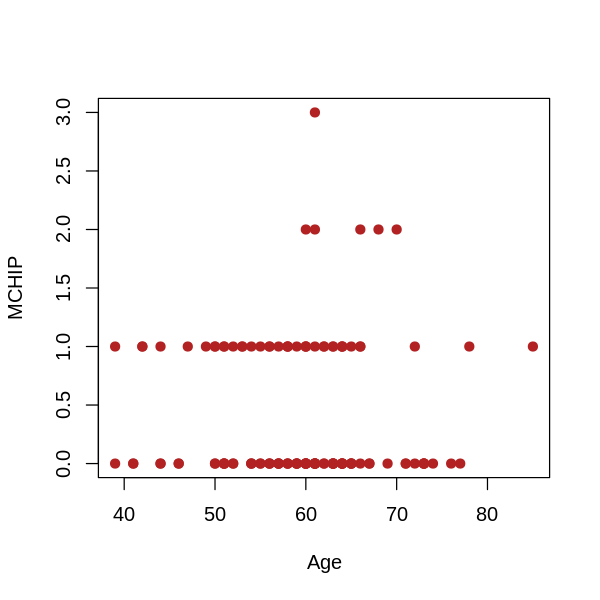

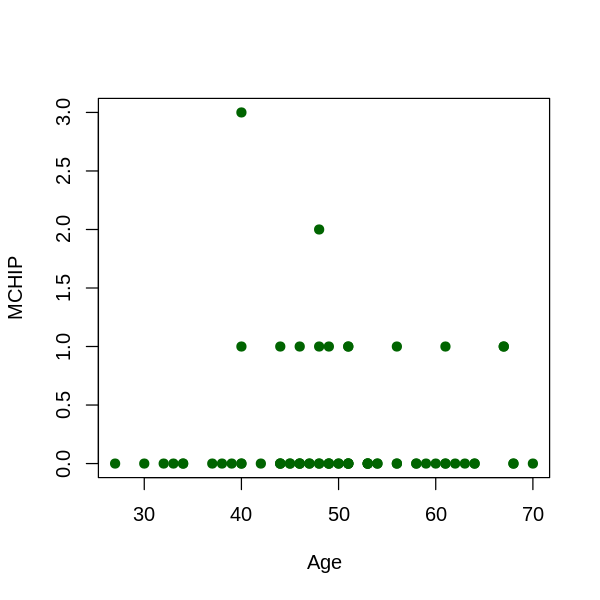

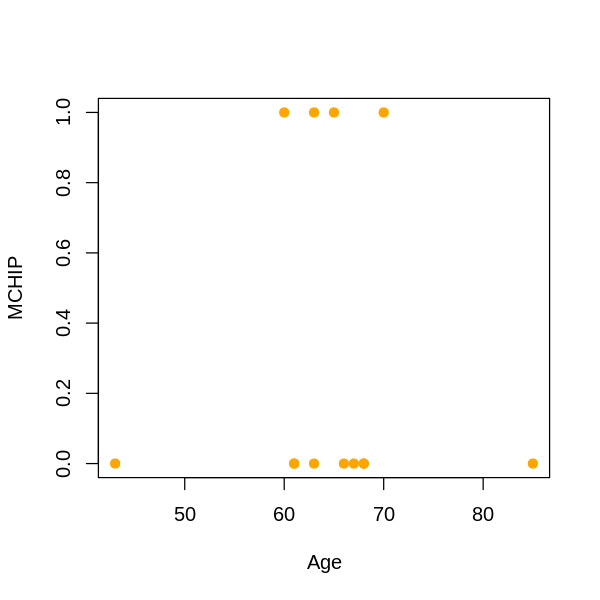

In [44]:
plot(allburdenMM[,c('Age','MCHIP')],col='steelblue',pch=19)
plot(allburdenAL[,c('Age','MCHIP')],col='firebrick',pch=19)
plot(allburdenPOEMS[,c('Age','MCHIP')],col='darkgreen',pch=19)
plot(allburdenMGUS[,c('Age','MCHIP')],col='orange',pch=19)

In [45]:
pdf(file="MCHIP1.pdf",height=5,width=5)
plot(allburdenMM[,c('Age','MCHIP')],col='steelblue',pch=19)
dev.off()
pdf(file="MCHIP2.pdf",height=5,width=5)
plot(allburdenAL[,c('Age','MCHIP')],col='firebrick',pch=19)
dev.off()
pdf(file="MCHIP3.pdf",height=5,width=5)
plot(allburdenPOEMS[,c('Age','MCHIP')],col='darkgreen',pch=19)
dev.off()
pdf(file="MCHIP4.pdf",height=5,width=5)
plot(allburdenMGUS[,c('Age','MCHIP')],col='orange',pch=19)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate




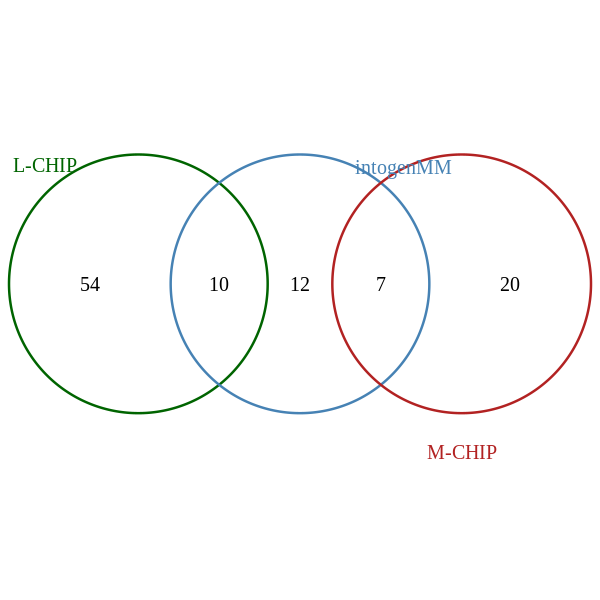

In [46]:
library(VennDiagram)
options(repr.plot.height=5,repr.plot.width=5)
input<-list(intersect(intoMM$Symbol,rownames(cleangenesnp)),intersect(MCHIP$Gene,rownames(cleangenesnp)),intersect(LCHIP$Gene,rownames(cleangenesnp)))
Table<-calculate.overlap(input)
venn<-venn.diagram(input,NULL, main.cex = 10,
category = c("intogenMM","M-CHIP",'L-CHIP'),
              col = c("steelblue","firebrick","darkgreen"),
               cat.col= c("steelblue","firebrick","darkgreen"),   
                   imagetype = "tiff",  main.fontfamily="serif") 
grid.draw(venn)
ggsave(venn,filename="venn.pdf",height=5,width=5)

In [47]:
input

[[1]]
 [1] "KRAS"   "NRAS"   "BRAF"   "TP53"   "ATM"    "PRKD2"  "FGFR3"  "PRDM1" 
 [9] "IRF4"   "SETD2"  "MAX"    "SP140"  "CCND1"  "CYLD"   "PTPN11" "NFKB2" 
[17] "BCL7A"  "CDKN1B" "NFKBIA" "RB1"    "LRP1B"  "DIS3"   "EGFR"   "FAT4"  
[25] "TRAF3"  "ZFHX3"  "MAF"    "KDM5C"  "IDH1"  

[[2]]
 [1] "ASXL1"  "BCOR"   "BRAF"   "CBL"    "CREBBP" "DNMT3A" "EP300"  "ETV6"  
 [9] "EZH2"   "FLT3"   "GNAS"   "IDH1"   "IDH2"   "IKZF1"  "JAK2"   "KDM6A" 
[17] "KRAS"   "MPL"    "NF1"    "NRAS"   "PTPN11" "RUNX1"  "SETD2"  "SF3B1" 
[25] "TET2"   "TP53"   "ZRSR2" 

[[3]]
 [1] "ALK"      "ARID1A"   "ARID1B"   "ARID5B"   "ATM"      "ATR"     
 [7] "BCL2"     "BCL6"     "BCL7A"    "BIRC3"    "BRCA1"    "CARD11"  
[13] "CCND1"    "CCND3"    "CD79A"    "CDKN2A"   "CHD8"     "CHEK2"   
[19] "CXCR4"    "DDX3X"    "DMD"      "DTX1"     "DUSP2"    "FAT1"    
[25] "FAT2"     "FAT4"     "FBXW7"    "HIST1H1C" "HIST1H1D" "HIST1H1E"
[31] "IGLL5"    "IKZF3"    "IRF4"     "KLHL6"    "KMT2C"    "KMT2D"   
[37] "LRP1B"    "LTB"      "MGA"      "MPEG1"    "MYC"      "MYD88"   
[43] "NCOR1"    "NCOR2"    "NEB"      "NFKBIA"   "NOTCH1"   "NOTCH2"  
[49] "PCLO"     "PDGFRB"   "PIK3CA"   "POT1"     "PRDM1"    "PRUNE2"  
[55] "PTEN"     "PTPRD"    "PTPRK"    "RB1"      "RET"      "ROS1"    
[61] "SPEN"     "SYNE1"    "TRAF3"    "XPO1"